In [138]:
import numpy as np
from igraph import *
import networkx as nx
import time
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import random


def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = matrix.shape[0]

    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i] == 1:
                res[start].append(i)
        start += 1
    return res


def check_time(function, args):
    start = time.time()
    result =function(*args)
    delta = time.time() - start
    #print("seconds : ", delta)
    return result, delta

# Problem I

Generate graph

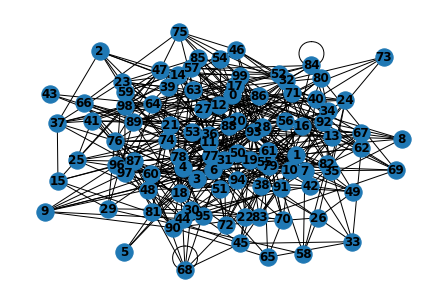

28


In [139]:
VERT = 100
CONN = 500

np.random.seed(1000)
G = nx.Graph()
G.add_nodes_from( np.arange(VERT) )
[ G.add_edge(i, j, weight=k) for i, j, k in zip(np.random.randint(0, VERT, CONN), np.random.randint(0, VERT, CONN), np.random.randint(1, 50, CONN)) ]
#G.add_edges_from( [ (i, j) for i, j in zip(np.random.randint(0, VERT, CONN), np.random.randint(0, VERT, CONN)) ] )
nx.draw(G, with_labels=True, font_weight="bold")
plt.show() 
print(G.adj[0][75]['weight'])

In [140]:
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(G).todense() == nx.linalg.graphmatrix.adjacency_matrix(G).todense().T))
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(G).todense() >= 0))

True
True


In [141]:
target = np.random.randint(0, VERT)
print('target == ', target)

result1, delta1 = check_time(nx.dijkstra_path, args=(G, 0, target))
result2, delta2 = check_time(nx.bellman_ford_path, args=(G, 0, target))
print('paths ', result1, result2)
print('times ', delta1, delta2)

target ==  79
paths  [0, 37, 84, 80, 69, 79] [0, 37, 84, 80, 69, 79]
times  0.0009989738464355469 0.0020024776458740234


In [142]:
t1 = 0
t2 = 0
n = 10

for i in range(n):
    target = np.random.randint(0, VERT)
    result1, delta1 = check_time(nx.dijkstra_path, args=(G, 0, target))
    result2, delta2 = check_time(nx.bellman_ford_path, args=(G, 0, target))
    t1 += delta1
    t2 += delta2
print('dijkstra_path = ', t1 / n)
print('bellman_ford_path = ', t2 / n)

dijkstra_path =  0.0006005525588989258
bellman_ford_path =  0.001401209831237793


# Problem 2

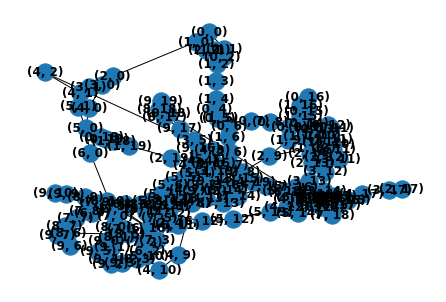

In [180]:
G = nx.grid_2d_graph(10, 20)

for target, source in G.edges():
    G[target][source]['weight'] = round(np.random.random() * 10, 1)
    
obstacles = random.sample(list((G.nodes())), 40)
G.remove_nodes_from(obstacles)

nx.draw(G, with_labels=True, font_weight="bold")
plt.show()

In [232]:
t = 0

for i in range(5):
    target = random.choice(list(G.nodes()))
    start = random.choice(list(G.nodes()))
    result, delta = check_time(nx.algorithms.shortest_paths.astar.astar_path, args=(G, start, target))
    t += delta
print(t / 5)

0.00020046234130859374
